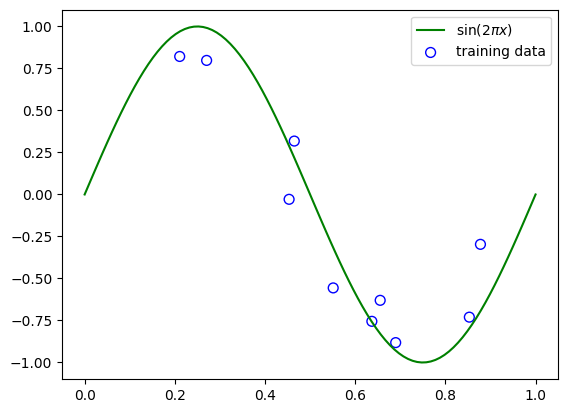

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# 在 Jupyter Notebook 或 Colab 中直接顯示圖表
%matplotlib inline

# 設定隨機種子，確保每次執行生成的隨機數（雜訊）都一樣，方便實驗重現
np.random.seed(896)

def sample(n_samples, std = 0.25):
    """
    生成帶有雜訊的樣本數據
    n_samples: 樣本數量
    std: 雜訊的標準差（控制數據偏離正弦波的程度）
    """
    # 在 0 到 1 之間均勻隨機抽取樣本，並進行排序以便後續繪圖
    x = np.sort(np.random.uniform(0, 1, n_samples))

    # 目標值 y = sin(2 * pi * x) + 高斯雜訊 (Normal noise)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale = std, size=x.shape)
    return x, y

# 生成 10 筆訓練用的數據點
n_samples = 10
x, y = sample(n_samples)

# --- 準備繪製真實的函數曲線 (Ground Truth) ---
# 在 0 到 1 之間生成 100 個等間距點，讓曲線看起來平滑
x_test = np.linspace(0, 1, 100)
# 理論上的真實值（不含雜訊的正弦波）
y_test = np.sin(2 * np.pi * x_test)

# 繪圖
plt.plot(x_test, y_test, c="g", label=r"$\sin(2\pi x)$") # 畫出綠色正弦波形
plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data") # 畫出藍色空心圓點（訓練集）
plt.legend() # 顯示圖例
plt.show()

In [18]:
for i, K in enumerate([0, 1, 3, 9]):
    a = np.array([np.power(x, k) for k in range(1 + K)])
    print(a)



[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.21080321 0.27051606 0.4534399  0.46494579 0.55125374 0.63697779
  0.65545015 0.68981333 0.85316892 0.8777954 ]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.21080321 0.27051606 0.4534399  0.46494579 0.55125374 0.63697779
  0.65545015 0.68981333 0.85316892 0.8777954 ]
 [0.044438   0.07317894 0.20560774 0.21617459 0.30388069 0.40574071
  0.4296149  0.47584243 0.72789721 0.77052477]
 [0.00936767 0.01979608 0.09323075 0.10050947 0.16751536 0.25844782
  0.28159115 0.32824245 0.62101928 0.6763631 ]]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.10803215e-01 2.70516057e-01 4.53439900e-01 4.64945794e-01
  5.51253740e-01 6.36977793e-01 6.55450153e-01 6.89813327e-01
  8.53168

K=0, w=: [-0.19410186]
K=1, w=: [ 1.167293   -2.40352288]
K=3, w=: [ -0.69160733  14.4684786  -40.54048788  27.82130232]
K=9, w=: [   -4850.58138275    82357.68505859  -572250.33984375  2099805.484375
 -4310128.5         4541129.4375      -994781.625      -2845787.375
  2864116.6875      -860148.5078125 ]


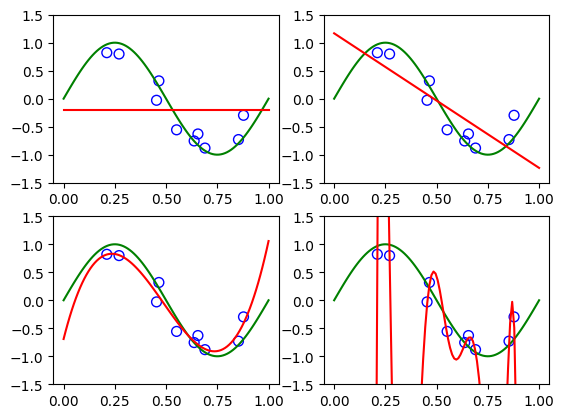

In [7]:
# 1. 建立 2x2 的子圖視窗，比較四種不同的階數 K
for i, K in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)

    # 2. 構造多項式特徵矩陣 (Design Matrix)
    # 這裡包含截距項 x^0 以及直到 x^K 的所有項
    X = np.array([np.power(x, k) for k in range(K+1)])
    X = X.transpose() # 轉置後形狀為 (樣本數, K+1)

    # 3. 使用正規方程 (Normal Equation) 求解 w
    # 公式：w = (X^T * X)^-1 * X^T * y
    # 這是線性回歸的解析解 (Analytical Solution)，不需設定學習率與迭代次數
    XT = X.transpose()
    XTy = XT @ y
    w = np.linalg.inv(XT @ X) @ XTy # 求逆矩陣並進行矩陣乘法
    print(f"K={K}, w=:", w)

    # 4. 生成預測曲線
    # 這裡使用測試集 x_test (100 個點) 來繪製平滑的擬合曲線
    y_predict = 0
    for j, wj in enumerate(w):
        y_predict += wj * np.power(x_test, j)

    # 5. 繪圖診斷
    plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data") # 原始數據
    y_test = np.sin(2 * np.pi * x_test) # 真實函數
    plt.plot(x_test, y_test, c="g", label=r"$\sin(2\pi x)$") # 綠線：目標
    plt.plot(x_test, y_predict, c="r", label="fitting")     # 紅線：模型擬合
    plt.ylim(-1.5, 1.5) # 統一 y 軸範圍，方便比較

w=: [-8.33472224e-02  1.73035496e+01 -2.69357669e+02  2.44170966e+03
 -1.14516008e+04  3.00762467e+04 -4.68895761e+04  4.33625651e+04
 -2.20245722e+04  4.73742552e+03]


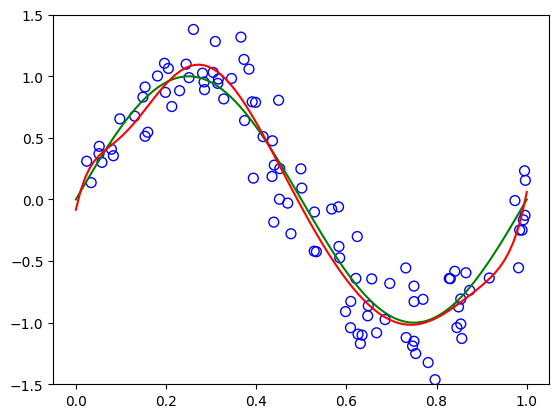

In [12]:
# 1. 增加樣本數到 100 筆
n_samples = 100
x, y = sample(n_samples) # 生成帶有雜訊的正弦波數據

K = 9 # 維持高階多項式

# 2. 構造多項式特徵矩陣
# 生成 [x^0, x^1, ..., x^9] 的特徵，形狀為 (100, 10)
X = np.array([np.power(x, k) for k in range(K+1)])
X = X.transpose()

# 3. 使用正規方程 (Normal Equation) 求解 w
# 當數據量變大時，矩陣運算的結果會變得更穩定
XT = X.transpose()
XTy = XT @ y
w = np.linalg.inv(XT @ X) @ XTy
print("w=:", w)

# 4. 在測試集上生成預測曲線
y_predict = 0
for i, wi in enumerate(w):
    y_predict += wi * np.power(x_test, i)

# 5. 繪製圖表
plt.scatter(x, y, facecolor="none", edgecolor="b", s=50, label="training data")

# 畫出綠色真實函數與紅色模型擬合曲線
y_test = np.sin(2 * np.pi * x_test)
plt.plot(x_test, y_test, c="g", label=r"$\sin(2\pi x)$")
plt.plot(x_test, y_predict, c="r", label="fitting")
plt.ylim(-1.5, 1.5)

plt.show()